# Recommendtion System for Ecommerce Shop

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
print("import complete")

import complete


#### Data Importation

In [2]:

data = pd.read_csv('ratings_beauty.csv')
print("Import complete")

Import complete


#### Data exploration

In [3]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [4]:
#summarize the data
data.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


In [5]:
#Shape of the data
data.shape

(2023070, 4)

In [6]:
#Displaying the first five columns of the data
data.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [7]:
data.tail()

,UserId,ProductId,Rating,Timestamp
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200
2023069,A1PB6OT0OOPKNQ,B00LU0LTOU,5.0,1405641600


In [8]:
#checking for missing values
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

### Visualization

In [9]:
#Importing Seaborn - a visualization library
import seaborn as sns

<AxesSubplot:xlabel='Rating', ylabel='count'>

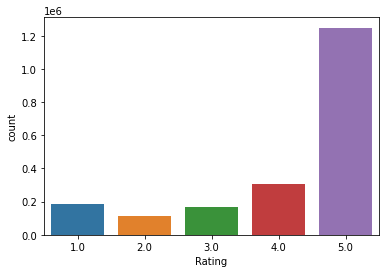

In [10]:
#Count number of every ratng graphically
sns.countplot(x='Rating', data=data)

In [11]:
#How many users have given a particular rating
data.groupby('Rating')['UserId'].count()

Rating
1.0     183784
2.0     113034
3.0     169791
4.0     307740
5.0    1248721
Name: UserId, dtype: int64

### Data Preprocesing

In [12]:
#removing timestamp column because we don't need it.
data.drop('Timestamp', inplace= True, axis= 1)
data

,UserId,ProductId,Rating
0,A39HTATAQ9V7YF,0205616461,5.0
1,A3JM6GV9MNOF9X,0558925278,3.0
2,A1Z513UWSAAO0F,0558925278,5.0
3,A1WMRR494NWEWV,0733001998,4.0
4,A3IAAVS479H7M7,0737104473,1.0
...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0


In [13]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.321386,7533
B0009V1YR8,3.568839,2869
B0043OYFKU,4.310456,2477
B0000YUXI0,4.405040,2143
B003V265QW,4.365421,2088
...,...,...
B0013H228W,5.000000,1
B0013GNAIE,5.000000,1
B0013GNAG6,5.000000,1


In [14]:
#Checking number of unique users
data['UserId'].nunique()
# data.ProductId.nunique()

1210271

In [15]:
#Reducing sample size
print(data.shape)
#Reduce the quatity
data = data.sample(n=10000)
data.shape


(2023070, 3)


(10000, 3)

<AxesSubplot:xlabel='Rating', ylabel='count'>

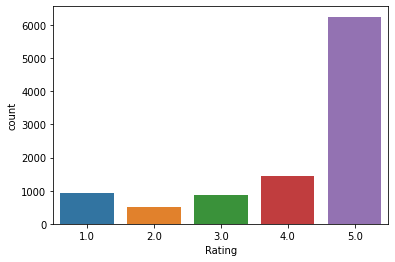

In [16]:
sns.countplot(x='Rating', data=data)

In [17]:
data.head()

,UserId,ProductId,Rating
758251,A12M88RDD6563F,B001OHUETA,3.0
968742,A3B5LM6S42SU3Z,B00317FSMY,3.0
1443467,A1BZI1O35WB4Q4,B005SJSQIG,5.0
1252390,A1CCKUNMWHV8YM,B004K0KZXS,5.0
1042479,A3613NBA30UC14,B003G08A9E,5.0


In [18]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(data.groupby('ProductId')['Rating'].mean().sort_values(ascending=False))

#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(data.groupby('ProductId')['Rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,Rating,number of rating
ProductId,,
B001MA0QY2,4.352941,34
B003V265QW,4.214286,14
B0009V1YR8,3.214286,14
B00I073WLE,4.538462,13
B0043OYFKU,4.692308,13
...,...,...
B008ORT4NU,5.000000,1
B008OUMEEI,5.000000,1
B008OYP2PW,5.000000,1


<AxesSubplot:xlabel='ProductId'>

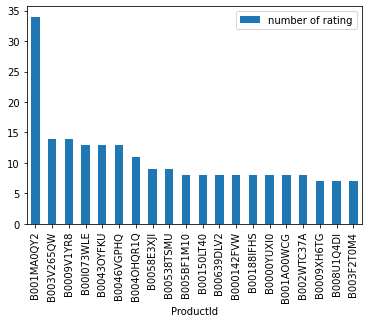

In [19]:
#Top 20 products sell by ecommerce website shown graphically

rating[['number of rating']].sort_values('number of rating',ascending=False).head(20).plot(kind='bar')

In [20]:
#Top 5 most popular products to be recommended to a new user
popular_products = rating[['number of rating']].sort_values('number of rating',ascending=False).head()
popular_products

,number of rating
ProductId,
B001MA0QY2,34
B003V265QW,14
B0009V1YR8,14
B00I073WLE,13
B0043OYFKU,13


### Machine Learning

In [21]:
#create a user item matrix. 
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId')
ratings_utility_matrix.head(10)

ProductId,1304482634,130451112X,4057362886,7899123011,9605406446,9759091062,9790776977,9790781105,979078127X,9790790961,...,B00KQBR9FM,B00KR1AWVE,B00KWFDBKE,B00KYWDP1A,B00KYXSF00,B00L0K7IXG,B00L21OV7E,B00L3KEIZO,B00L5JHZJO,B00LCLFMDG
UserId,,,,,,,,,,,,,,,,,,,,,
A00872631MA5VZ78PVZWS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01181851240JO66TFGH9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A01818243PXJHK1ZH4HUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A04371222UWPCRS81JO2Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0800614XXP7OI5XQQZ8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A08512727FFM2KLH27UJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A09341903DQP07TOL9PSY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0937998Q3IKKTTX1LTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WLE4YKHQUZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings_utility_matrix.shape

(9890, 8188)

In [23]:
ratings_utility_matrix.fillna(0, inplace=True)

In [24]:
# Transpose the matrix
X = ratings_utility_matrix.T

In [25]:
X.head()

UserId,A00872631MA5VZ78PVZWS,A01181851240JO66TFGH9,A01818243PXJHK1ZH4HUM,A04371222UWPCRS81JO2Z,A0800614XXP7OI5XQQZ8,A08512727FFM2KLH27UJ,A09341903DQP07TOL9PSY,A0937998Q3IKKTTX1LTA,A100WLE4YKHQUZ,A100WO06OQR8BQ,...,AZV7CNMMJERKW,AZVBHT2JGZS8U,AZVKC5S1BCBNU,AZVYPKD0YANHI,AZW95L7BDGTIL,AZWA8DUHCPBT8,AZY8322PL4DSJ,AZY96LU53VWGO,AZYH32578YZBF,AZYT0A29GC1I5
ProductId,,,,,,,,,,,,,,,,,,,,,
1304482634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130451112X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4057362886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7899123011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9605406446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X.shape

(8188, 9890)

#### Decomposing the matrix using TruncatedSVD, It is a dimensionality reduction technique.

In [27]:
from sklearn.decomposition import TruncatedSVD

In [28]:
#n_component is desired dimension of output data
SVD = TruncatedSVD(n_components=3) 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix

array([[ 3.07227877e-13,  6.46456082e-12, -2.66041895e-12],
       [-1.00421224e-08,  1.65065790e-06,  4.56768846e-06],
       [-1.50165608e-10,  1.54955908e-07, -4.76209586e-07],
       ...,
       [ 3.23353010e-08,  3.21341839e-06, -2.41211192e-06],
       [ 1.22548156e-05, -5.43241849e-03,  2.05919853e-03],
       [-4.53300846e-09, -1.84816536e-06, -2.83885371e-07]])

In [29]:
decomposed_matrix.shape

(8188, 3)

In [30]:
#corrcoef() returns the correlation matrix with correlation coefficient in it. 

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix

array([[ 1.        , -0.46319922,  0.88481256, ...,  0.99236096,
        -0.99837827, -0.89359982],
       [-0.46319922,  1.        , -0.82279209, ..., -0.56899645,
         0.41199506,  0.01610667],
       [ 0.88481256, -0.82279209,  1.        , ...,  0.93553652,
        -0.85685203, -0.5815212 ],
       ...,
       [ 0.99236096, -0.56899645,  0.93553652, ...,  1.        ,
        -0.98372847, -0.83139794],
       [-0.99837827,  0.41199506, -0.85685203, ..., -0.98372847,
         1.        ,  0.91770375],
       [-0.89359982,  0.01610667, -0.5815212 , ..., -0.83139794,
         0.91770375,  1.        ]])

In [31]:
correlation_matrix.shape

(8188, 8188)

In [32]:
#choose a random index
import random
i = random.randint(0,correlation_matrix.shape[0])
i

4453

In [38]:
#The Product ID of the product the customer purchased
product_ID = X.index[1]
product_ID

'130451112X'

In [39]:
#All the correlation of those products which are correlated to the product that customer purchase
correlation_ProductId = correlation_matrix[1]

correlation_ProductId

array([-0.46319922,  1.        , -0.82279209, ..., -0.56899645,
        0.41199506,  0.01610667])

In [40]:
correlation_ProductId.shape

(8188,)

In [44]:
#Top products to be displayed by the recommendation system to the above customer based on the purchase history of other cutomers on website
recommended_products = X.index[correlation_ProductId > 0.90] 
recommended_products = list(recommended_products)

#Top 10 Products recommended to the user based on the purchase done by user
recommended_products[0:10]

['130451112X',
 'B000052Y25',
 'B000052YME',
 'B000052YMS',
 'B0000530EZ',
 'B0000530NF',
 'B0000535CH',
 'B0000535UT',
 'B0000536EY',
 'B0000536F0']

In [37]:
import pickle


with open('model_pkl', 'wb') as files:
  pickle.dump(SVD, files)